# 決定木

最初に、フェイクの過去の雇用データを読み込みます。pandasを用いて、csvファイルをDataFrameに変換します。

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "c:/DataScience/DataScience/PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


scikit-learnは決定木を扱うために全てのデータを数値データにする必要があります。したがって、Y、Nは1、0とし、Levels of Educationも0-2の数値とします。現実には、想定外のデータや失われたデータの扱い方も考慮する必要があります。map()関数を用いることで、想定外のデータはNaNとして扱うことができます。

In [2]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


次に、決定木を構築するのに必要な特徴量を取り出します。

In [3]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

決定木を構築します。

In [4]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

決定木を図示しましょう。pyplot2がインストールされている必要があります。

value = [0. 5.]は、その点における0の不採用と5の採用を意味し、value = [3. 0.]はその点における3の採用と0の不採用を意味します。

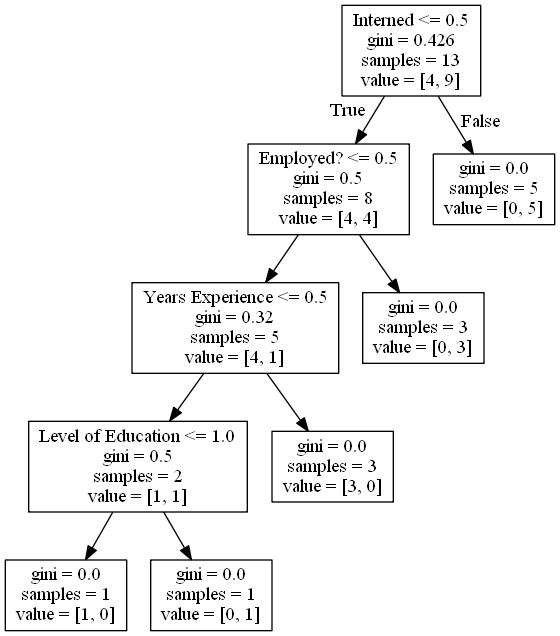

In [5]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## ランダムフォレストを用いたアンサンブル学習

10個の決定木から成るランダムフォレストを用いて、特定の候補者が採用されるかどうか予想してみましょう。

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print clf.predict([[10, 1, 4, 0, 0, 0]])
#...and an unemployed 10-year veteran
print clf.predict([[10, 0, 4, 0, 0, 0]])

[1]
[0]


## アクティビティ

テストデータを修正し、あなたが好みの候補者を採用にして、決定木を作成してみよう。嫌いな候補者を採用にするケースも試してみよう。そして、作成した決定木を元の決定木と比較してみよう。